<a href="https://colab.research.google.com/github/AjaharDaroga/BOOK_RECOMMENDATION_SYSTEM/blob/main/book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The main objective is to create a book recommendation system for users.**

In [2]:
# importing Basic libraries
import pandas as pd               #DataFrame
import numpy as np                
import seaborn as sns             #visualization library
import matplotlib.pyplot as plt   #visualization library
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

# Loading the data sets
Books = pd.read_csv("/content/drive/MyDrive/CAPSTONE_PROJECTS/UNSUPERVISED_ML_PROJECT/DATA/Books.csv")
Users = pd.read_csv("/content/drive/MyDrive/CAPSTONE_PROJECTS/UNSUPERVISED_ML_PROJECT/DATA/Users.csv")
Ratings = pd.read_csv("/content/drive/MyDrive/CAPSTONE_PROJECTS/UNSUPERVISED_ML_PROJECT/DATA/Ratings.csv")

Mounted at /content/drive


#Pre-processing of datasets

We have three different datasets which contains details of books, users and book ratings. Let's deep dive into each of those datasets.

# Books

In [4]:
# view the data
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Understand the Books dataset

In [5]:
# info of dataset
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


The last three columns contains no information that helps in the analysis process, hence we consider only the first 5 columns for further process.

In [6]:
# Rename the feature name for simplicity
Books.columns = ['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

#Taking the required subset
Books=Books[["ISBN","Book_Title","Book_Author",	"Year_Of_Publication", "Publisher"]]

In [7]:
# cheking for missing data
Books.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            1
Year_Of_Publication    0
Publisher              2
dtype: int64

In [8]:
# Feaching the rows that contain null values
Books[Books.isnull().any(axis=1)]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


We can see that the column Book-Author contains one null value and the column Publisher contains two null values. Therefore we replace them by 'Unknown'.

In [9]:
#Replacing null values by 'Unknown'
Books.fillna("Unknown",inplace=True)

In [10]:
# checking missing data after 
Books.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
dtype: int64

In [11]:
#Obatining the unique years 
Books["Year_Of_Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

While checking the unique years we can see that two years are mistakenly replaced by some text. Let's try to fix this issue.

In [12]:
Books[Books["Year_Of_Publication"]=='DK Publishing Inc']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [13]:
Books[Books["Year_Of_Publication"]=='Gallimard']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


After seen above recoreds we understand the mispalce the info in columns

In [14]:
#Interchanging the values
Books.at[209538 ,'Book_Title'] = 'DK Readers: Creating the X-Men, How It All Begen (Level 4: Proficient Readers)'
Books.at[209538 ,'Book_Author'] = 'Michael Teitelbaum'
Books.at[209538 ,'Year_Of_Publication'] = 2000
Books.at[209538 ,'Publisher'] = 'DK Publishing Inc'

Books.at[221678 ,'Book_Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
Books.at[221678 ,'Book_Author'] = 'James Buckley'
Books.at[221678 ,'Year_Of_Publication'] = 2000
Books.at[221678 ,'Publisher'] = 'DK Publishing Inc'

Books.at[220731 ,'Book_Title'] = 'Peuple du ciel, suivi de Les Bergers'
Books.at[220731 ,'Book_Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
Books.at[220731 ,'Year_Of_Publication'] = 2003
Books.at[220731 ,'Publisher'] = 'Gallimard'

In [15]:
#Converting year into int 
Books['Year_Of_Publication'] = Books['Year_Of_Publication'].astype(int)
#Checking info after converting Year-Of-Publication into integer
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271360 non-null  object
 3   Year_Of_Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [16]:
#Getting the years in ascending order
print(sorted(list(Books['Year_Of_Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


in the column Year of Publication there are invalid values such as 0 and greater than the present year. We will replace such values by mode.

In [17]:
#Imputing invalid values by mode
print("The mode of year of publication is:",Books['Year_Of_Publication'].mode()[0])
Books[Books['Year_Of_Publication'] > 2021] = Books['Year_Of_Publication'].mode()[0]
Books[Books['Year_Of_Publication'] == 0] = Books['Year_Of_Publication'].mode()[0]
#Checking for unique years after replacement
print(sorted(list(Books['Year_Of_Publication'].unique())))

The mode of year of publication is: 2002
[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [18]:
# Uppercasing all alphabets in ISBN
Books['ISBN'] = Books['ISBN'].str.upper()

#Checking for duplicates
print("Number of duplicates is:",len(Books[Books.duplicated()]))
# Drop duplicate rows
Books.drop_duplicates(keep='last', inplace=True) 
Books.reset_index(drop = True, inplace = True)

Number of duplicates is: 4936


In [19]:
#Checking for the final data set shape
Books.shape

(266424, 5)

In [20]:
# Final Dataset for Books
df_book=Books.copy()
df_book.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


# Users

In [21]:
# view the data
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
# info of dataset
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [23]:
# Rename the feature name for performing operation
Users.columns = ['User_ID','Location','Age']

In [24]:
# missing data
Users.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

In [25]:
# checking for unique values
print(sorted(list(Users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

There are so many invalid entries in this column. So we will replace those with median. Here we will fix the lower age limit as 10 and upper age limit as 90.

In [26]:
# Imputing invalid entries with nan 
Users.loc[(Users.Age > 90) | (Users.Age < 10), 'Age'] = np.nan
# Filling nan with median 
Users.Age = Users.Age.fillna(Users.Age.median())
#Converting Datatype to integer
Users.Age = Users.Age.astype(np.int32) 
#Checking unique age after replacement
print(sorted(Users.Age.unique()))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [27]:
#Examining location
Users["Location"]

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

Since the location is given in city,state,country format, we will now extract these from location.

In [28]:
#Creating a list for each location 
sep_list = Users.Location.str.split(', ')
#Creating empty lists to store city, state and country  
city = []
state = []
country = []

for i in range(0,len(sep_list)):
     #removing invalid entries 
    if sep_list[i][0] == ' ' or sep_list[i][0] == '' or sep_list[i][0]=='n/a' or sep_list[i][0] == ',': 
        city.append('other')
    else:
        city.append(sep_list[i][0].lower())
    
    #if the sep_list contains only city
    if(len(sep_list[i])<2):
        state.append('other')
        country.append('other')
    else:
        #removing invalid entries
        if sep_list[i][1] == ' ' or sep_list[i][1] == '' or sep_list[i][1]=='n/a' or sep_list[i][1] == ',':    
            state.append('other')      
        else:
            state.append(sep_list[i][1].lower())
        
        #if the sep_list contains only city and country
        if(len(sep_list[i])<3):
            country.append('other')
        else:
            #removing invalid entries
            if sep_list[i][2] == ''or sep_list[i][1] == ',' or sep_list[i][2] == ' ' or sep_list[i][2] == 'n/a':
                country.append('other')
            else:
                country.append(sep_list[i][2].lower())

#Removing location column       
Users = Users.drop('Location',axis=1)
temp = []

#handling cases in which entries are in the form city/stat
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])

#Creating a dataframes for city, state and country
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

#Concatinating these dataframes with users_df
Users = pd.concat([Users, df_city], axis=1)
Users = pd.concat([Users, df_state], axis=1)
Users = pd.concat([Users, df_country], axis=1)

In [29]:
#Checking for duplicates
print("Number of duplicates is:",len(Users[Users.duplicated()]))

Number of duplicates is: 0


In [30]:
#Checking shape
Users.shape

(278858, 5)

In [31]:
#Final Dataset for Users
df_user=Users.copy()
df_user.head()

,User_ID,Age,City,State,Country
0,1,32,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,32,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,32,farnborough,hants,united kingdom


# Ratings

In [32]:
# view the data
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
# Rename the feature name for performing operation
Ratings.columns = ['User_ID','ISBN','Book_Rating']

In [34]:
#Basic info
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User_ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book_Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Since there are chances of presence of extra characters in ISBN in ratings dataset, we will remove these extra characters.

In [35]:
#Storing ISBN
bookISBN = df_book['ISBN'].tolist()
#Storing any character other than any combination of letters and digits case insensitive
reg = "[^A-Za-z0-9]" 

for index, row_Value in Ratings.iterrows():
  #Searching for special characters in ratings_df.ISBN
    z = re.search(reg, row_Value['ISBN'])    
    
    if z:
      #Deleting special characters 
        f = re.sub(reg,"",row_Value['ISBN'])
        
        #Checking if the cleaned book id is in books_df or not
        if f in bookISBN:
          #If True we will replace the value with cleaned bookid.If false we will kepp it as itself.Because later while taking inner join it wont affect.
            Ratings.at[index , 'ISBN'] = f

# Uppercasing all alphabets in ISBN
Ratings['ISBN'] = Ratings['ISBN'].str.upper()

In [36]:
#Checking for duplicates
print("Number of duplicates is:",len(Ratings[Ratings.duplicated()]))
#Dropping duplicates
Ratings.drop_duplicates(keep='last', inplace=True)
#Removing original index
Ratings.reset_index(drop = True, inplace = True)

Number of duplicates is: 4


In [37]:
#Final Dataset for Ratings
df_rating=Ratings.copy()
df_rating.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
#Checking shape
df_rating.shape

(1149776, 3)

# Final Dataset (Books,Users,Ratings) Merging

In [39]:
#Merging
combined_df = pd.merge(df_book, df_rating, on='ISBN', how='inner')
combined_df = pd.merge(combined_df, df_user, on='User_ID', how='inner')

combined_df.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,32,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,32,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,32,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,32,timmins,ontario,canada


In [40]:
#Basic info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017530 entries, 0 to 1017529
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1017530 non-null  object
 1   Book_Title           1017530 non-null  object
 2   Book_Author          1017530 non-null  object
 3   Year_Of_Publication  1017530 non-null  int64 
 4   Publisher            1017530 non-null  object
 5   User_ID              1017530 non-null  int64 
 6   Book_Rating          1017530 non-null  int64 
 7   Age                  1017530 non-null  int32 
 8   City                 1017530 non-null  object
 9   State                1017530 non-null  object
 10  Country              1017530 non-null  object
dtypes: int32(1), int64(3), object(7)
memory usage: 89.3+ MB


In [41]:
#Checking shape of the combined dataframe 
print("Shape of combined_df is:",combined_df.shape)

Shape of combined_df is: (1017530, 11)


# EDA

In [42]:
#Creating a copy 
df=combined_df.copy()
df.shape

(1017530, 11)

In [43]:
#Unique values of book-ratings
df["Book_Rating"].unique()

array([ 0,  5,  6,  7,  9, 10,  8,  3,  1,  4,  2])

Since our dataset contains rating value of 0 and usually ratings are given on a scale of 1-10, we will remove 0 ratings.

In [44]:
#Removing 0 ratings
df=df[~(combined_df["Book_Rating"]==0)]
df["Book_Rating"].value_counts()

8     90426
10    70277
7     65357
9     59924
5     44750
6     31194
4      7497
3      5037
2      2334
1      1461
Name: Book_Rating, dtype: int64

In [45]:
#Checking shape
print("The shape of dataset after removing 0 ratings is",df.shape)

The shape of dataset after removing 0 ratings is (378257, 11)


**1.Most Rated Books**

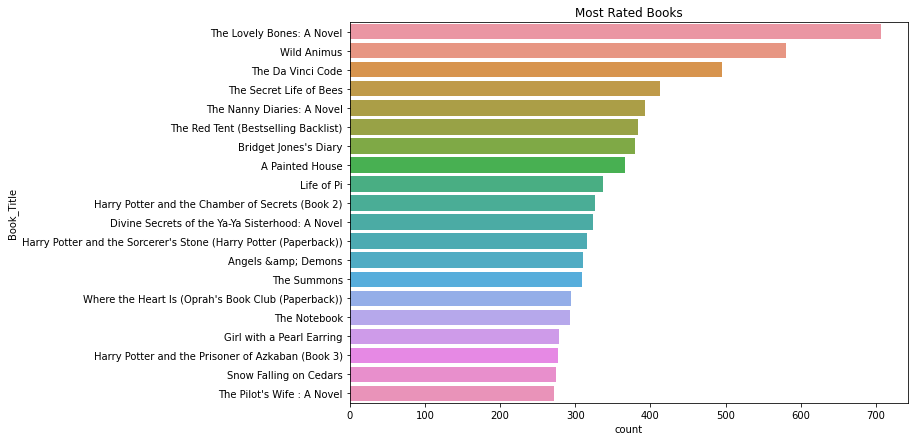

In [46]:
# Most Read Books
most_read = df['Book_Title'].value_counts().reset_index()
most_read.columns = ['Book_Title','count']
#plotting
plt.figure(figsize = (10,7))
plt.title("Most Rated Books")
sns.barplot(x = 'count', y = 'Book_Title', data = most_read.head(20))
plt.show()

Obeservation:

'The Lovely Bones:A Novel' is the book with the highest number of ratings.

It is followed by 'Wild Animus' and 'The Da Vinci Code'

**2. Book Authors**

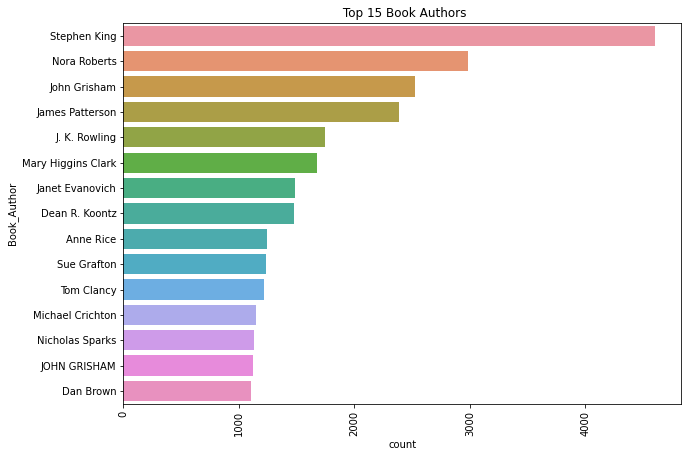

In [47]:
# Top 15 book authors by number of interactions
plt.figure(figsize=(10,7))
sns.countplot(y="Book_Author",order=df['Book_Author'].value_counts().index[0:15],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Authors")
plt.show()

Observation: 

Analyzing the given data, one can conclude that Stephan King's books received the most number of ratings.

**3.Number of books by authors**

In [48]:
most_books = df.groupby('Book_Author').agg({'Book_Title':"nunique"}).sort_values(by='Book_Title',ascending=False)
most_books.reset_index(inplace=True)
most_books.rename(columns={"Book_Title":"Book Count"},inplace=True)
most_books=most_books[:15]
most_books.head()

,Book_Author,Book Count
0,William Shakespeare,343
1,Agatha Christie,308
2,Stephen King,283
3,Barbara Cartland,279
4,Nora Roberts,211


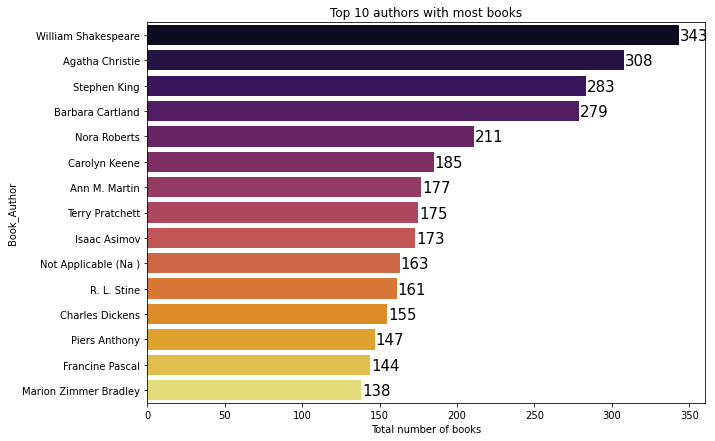

In [49]:
plt.figure(figsize=(10,7))
ax = sns.barplot(most_books['Book Count'], most_books["Book_Author"], palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.60, i.get_y()+.60,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**4.Best Publishers**

Text(0.5, 1.0, ' Top 15 Book Publisher')

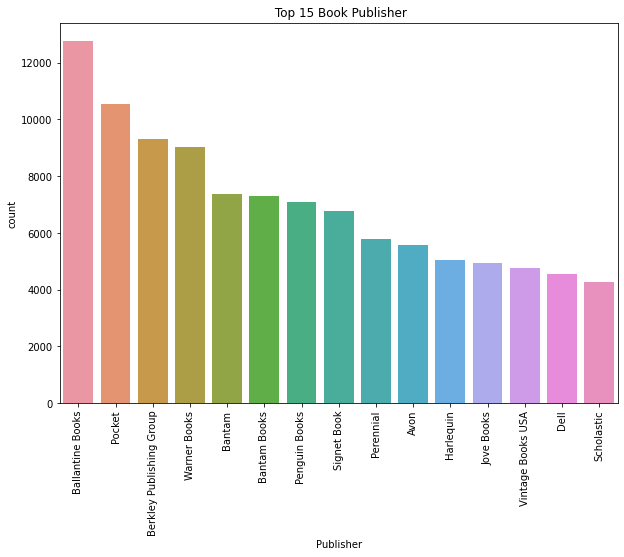

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(x="Publisher",order=df['Publisher'].value_counts().index[0:15],data=df).tick_params(axis='x', rotation=90)
plt.title(" Top 15 Book Publisher")

Text(0.5, 1.0, 'No of readers from each city (Top 10)')

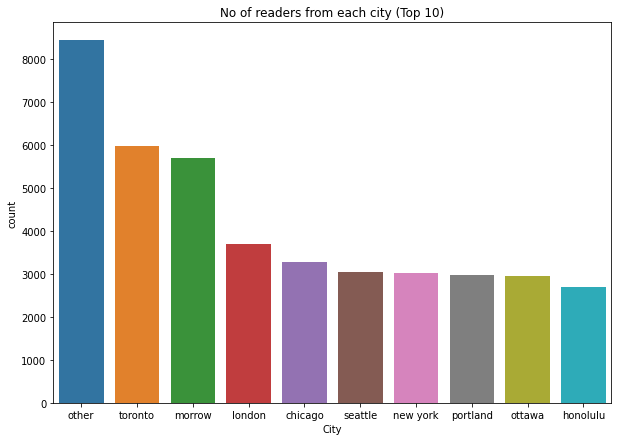

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(x="City",order=df['City'].value_counts().index[0:10],data=df)
plt.title("No of readers from each city (Top 10)")

Text(0.5, 1.0, 'No of readers from each State (Top 10)')

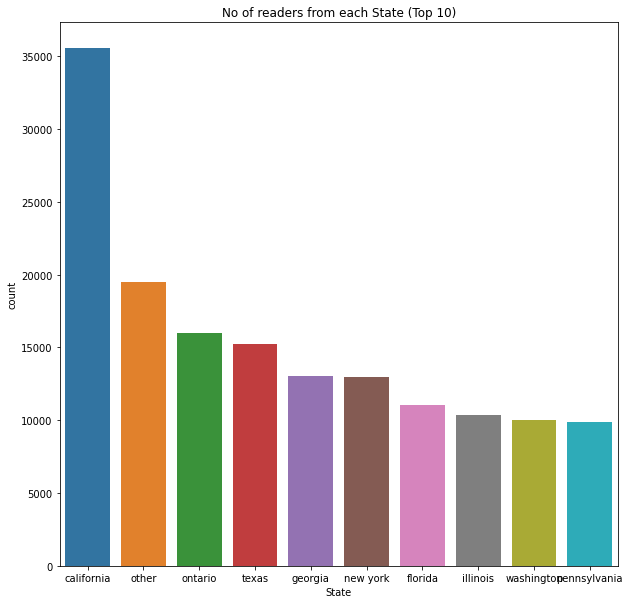

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(x="State",order=df['State'].value_counts().index[0:10],data=df)
plt.title("No of readers from each State (Top 10)")

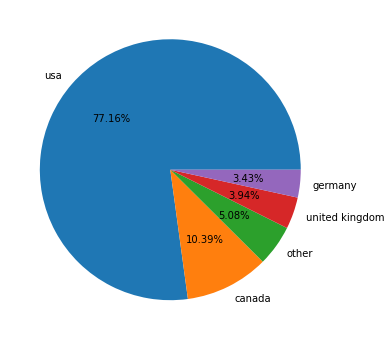

In [53]:
# Top Country 
Auther= df.Country.value_counts().index
values = df.Country.value_counts().values
# Pie Chart Top 5
plt.figure(figsize = (10,6))
#Ploting pie chart by labeling the wedges with their numeric value
plt.pie(values[:5], labels=Auther[:5],autopct="%1.2f%%")
plt.show()

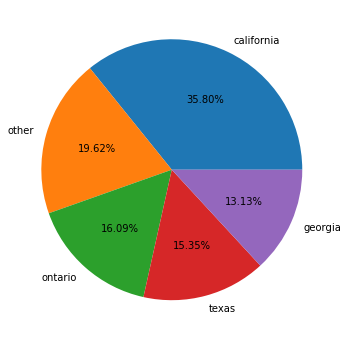

In [54]:
# Top State 
Auther= df.State.value_counts().index
values = df.State.value_counts().values
# Pie Chart Top 5
plt.figure(figsize = (10,6))
#Ploting pie chart by labeling the wedges with their numeric value
plt.pie(values[:5], labels=Auther[:5],autopct="%1.2f%%")
plt.show()

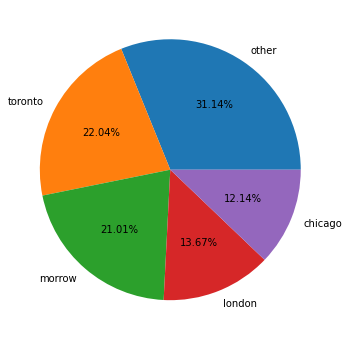

In [55]:
# Top City
Auther= df.City.value_counts().index
values = df.City.value_counts().values
# Pie Chart Top 5
plt.figure(figsize = (10,6))
#Ploting pie chart by labeling the wedges with their numeric value
plt.pie(values[:5], labels=Auther[:5],autopct="%1.2f%%")
plt.show()

**Based on Age**

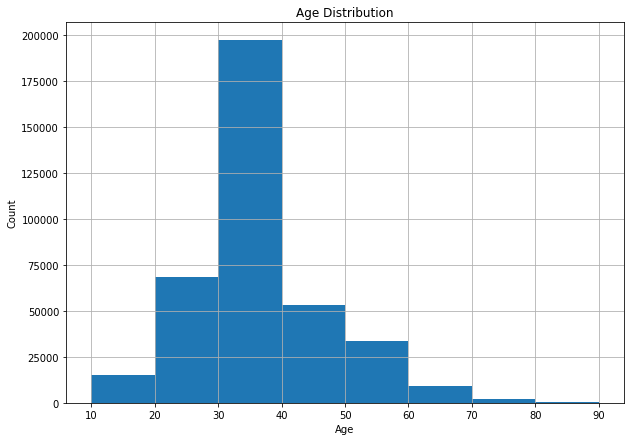

In [56]:
plt.figure(figsize=(10,7))
df.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [57]:
# Create new dataframe 
df2=df[['Book_Title','Book_Author','Age']]

# Dividing based on age group
category=pd.cut(df2['Age'],bins=[10,20,40,60,80],labels=['Teenage','Youth','Middle Age','Elderly'])

# inserting in dataframe
df2.insert(3,'Age Group',category)
df2.head()


,Book_Title,Book_Author,Age,Age Group
1,Clara Callan,Richard Bruce Wright,32,Youth
9,Where You'll Find Me: And Other Stories,Ann Beattie,32,Youth
12,The Middle Stories,Sheila Heti,32,Youth
13,Jane Doe,R. J. Kaiser,32,Youth
15,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,32,Youth


In [58]:
# Small dataset for each age group
Youth_df=df2[df2['Age Group']=='Youth']
Teenage_df=df2[df2['Age Group']=='Teenage']
Middle_age_df=df2[df2['Age Group']=='Middle Age']
Elderly_df=df2[df2['Age Group']=='Eldery']

In [59]:
# Define the fuction
def books_by_age_group(category_df,title):
  ''' take age gruop as input and return the plot which highest book like by that age group'''
  plt.figure(figsize=(10,7))
  sns.countplot(x="Book_Title",order=category_df['Book_Title'].value_counts().index[0:10],data=category_df).tick_params(axis='x', rotation=90)
  plt.title(title)

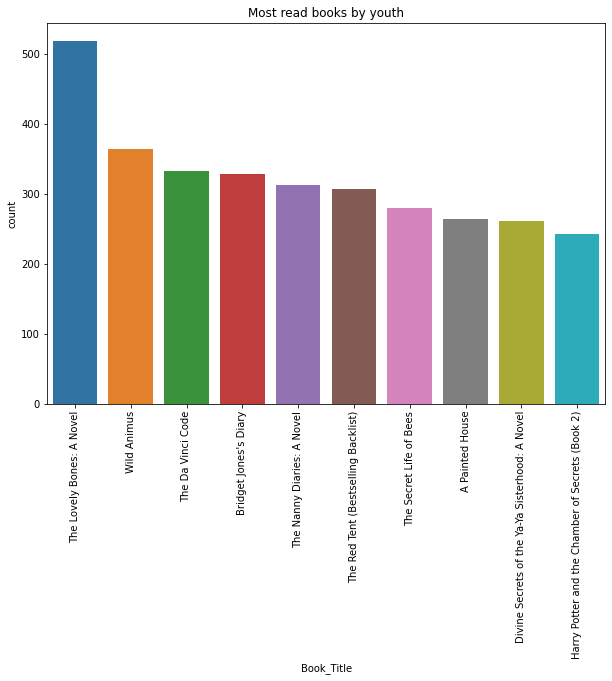

In [60]:
# For Youth age group
books_by_age_group(Youth_df,'Most read books by youth')

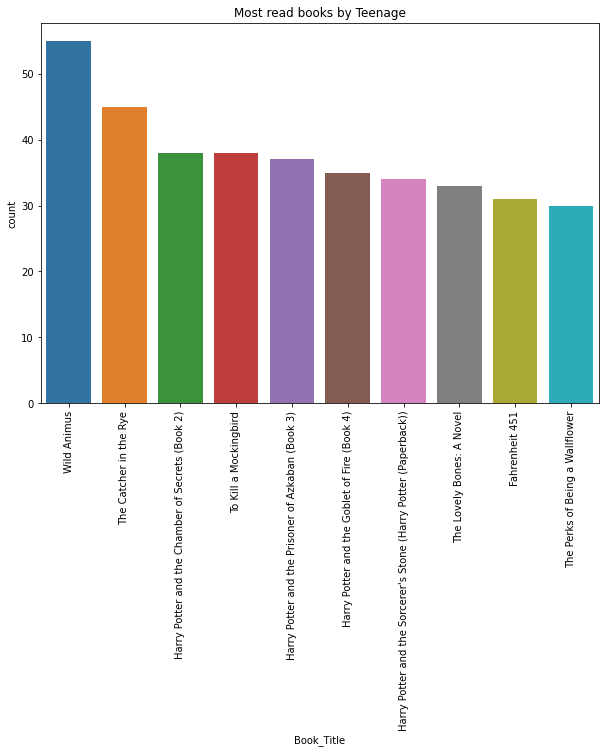

In [61]:
# For Teenge age group
books_by_age_group(Teenage_df,'Most read books by Teenage')

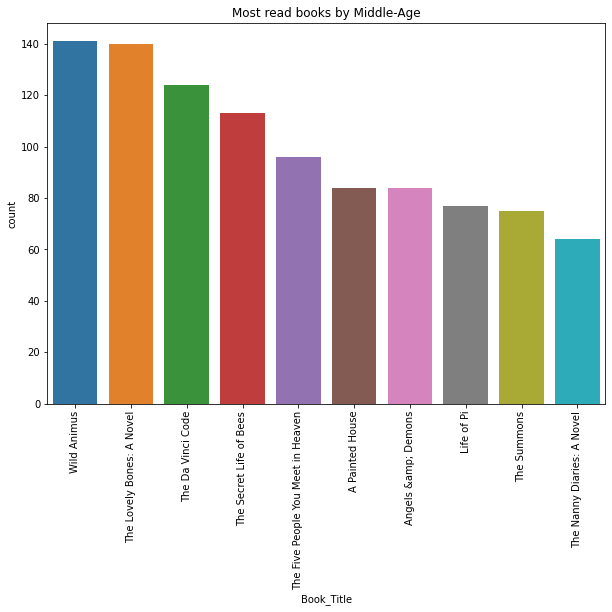

In [62]:
# For Middle age group
books_by_age_group(Middle_age_df,'Most read books by Middle-Age')

#Popularity Based Reccomedation
BASED ON RATING

In [63]:
# Top book based on rating
Top_Books= pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].count()
                         .sort_values(ascending=False).head(10))

print('The Top 10 Books Recommendation : ')
Top_Books.rename(columns={"Book_Rating":"Number Of Ratings"},inplace=True)
Top_Books.reset_index(inplace=True)
Top_Books.head(10)

The Top 10 Books Recommendation : 


,Book_Title,Number Of Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,495
3,The Secret Life of Bees,413
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,380
7,A Painted House,366
8,Life of Pi,337
9,Harry Potter and the Chamber of Secrets (Book 2),326


# Simple Recommendation

In [65]:
df1=df[["ISBN",'Book_Author','Book_Title','Book_Rating']]
votes_df= df1.groupby(["ISBN",'Book_Title','Book_Author']).agg({'Book_Rating':"mean",'Book_Title':"count"})
print('# of users: %d' % len(votes_df))
votes_df.rename(columns={"Book_Rating":"Vote_Average", "Book_Title":"Number_of_Votes"},inplace=True)
votes_df.reset_index(inplace=True)
votes_df.sort_values(by="Number_of_Votes",ascending=False)

# of users: 147013


,ISBN,Book_Title,Book_Author,Vote_Average,Number_of_Votes
21565,0316666343,The Lovely Bones: A Novel,Alice Sebold,8.185290,707
115998,0971880107,Wild Animus,Rich Shapero,4.390706,581
38210,0385504209,The Da Vinci Code,Dan Brown,8.426230,488
17692,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,8.182768,383
4042,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,7.887500,320
...,...,...,...,...,...
61929,0552993360,To Be Young: Some Chapters of Autobiography,Mary Lutyens,3.000000,1
61928,0552993255,Quiet War of Rebecca Sheldon,Kathleen Rowntree,7.000000,1
61927,0552991872,The Right True End,Stan Barstow,9.000000,1
61926,0552990566,Brother of the More Famous Jack,Barbara Trapido,7.000000,1


In [66]:
# Calculate mean of vote average column
C = votes_df['Vote_Average'].mean()
print(C)
# Calculate the minimum number of votes required to be in the chart, m
m = votes_df['Number_of_Votes'].quantile(0.90)
print(m)
# Filter out all qualified books into a new DataFrame
weighted_rating_df = votes_df.copy().loc[votes_df['Number_of_Votes'] >= m]
weighted_rating_df.shape

7.528032305000495
4.0


(18395, 5)

In [67]:
# Function that computes the weighted rating of each book
def weighted_rating(votes_df, m=m, C=C):
    v = votes_df['Number_of_Votes']
    R = votes_df['Vote_Average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with weighted_rating()
weighted_rating_df['score'] = weighted_rating_df.apply(weighted_rating, axis=1)

In [69]:
#Sort movies based on score calculated above
weighted_rating_df.sort_values('score', ascending=False,inplace=True)

#Print the top 15 movies
weighted_rating_df[["ISBN",'Book_Title',"Book_Author", 'Vote_Average', 'Number_of_Votes', 'score']].head(10)

,ISBN,Book_Title,Book_Author,Vote_Average,Number_of_Votes,score
45823,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,9.869565,23,9.522671
70304,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.720000,25,9.417660
2638,0060256656,The Giving Tree,Shel Silverstein,9.750000,20,9.379672
102335,0836213319,Dilbert: A Book of Postcards,Scott Adams,9.923077,13,9.359537
131090,1888054557,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,9.340809
23973,0345339738,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,9.402597,77,9.310026
102428,0836220889,Calvin and Hobbes,Bill Watterson,9.583333,24,9.289719
40331,0394800389,Fox in Socks (I Can Read It All by Myself Begi...,Dr. Seuss,9.785714,14,9.284007
102382,0836218221,The Authoritative Calvin and Hobbes (Calvin an...,Bill Watterson,9.600000,20,9.254672
86316,0743454529,"My Sister's Keeper : A Novel (Picoult, Jodi)",Jodi Picoult,9.545455,22,9.235082


# Auther Based Recommendation

In [71]:
book_name = input("Enter a book name: ")
n = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Chamber of Secrets (Book 2)
Enter number of books to recommend: 5


In [72]:
def author_based_recommendation(bookName,n,x=True):
  
  author=weighted_rating_df.loc[weighted_rating_df['Book_Title'] == bookName].reset_index(drop = True).iloc[0]['Book_Author']
  if x:
    print("The author of",bookName,"is",author)
    print("Top books by the same author are:\n")

  books_by_same_author_df = weighted_rating_df[weighted_rating_df['Book_Author'] == author]
  books_by_same_author_df = books_by_same_author_df.sort_values(by=['Vote_Average'])
  books_by_same_author=[]
  w=0
  for i in books_by_same_author_df["Book_Title"]:
        #Avoiding recommending the same user input book aswell as repetation of recomendation and limitting number of recommendation
        #Stops when the number of recommendation  reaches total number of books written by the author
        if (i!= bookName) and (i not in books_by_same_author) and (len(books_by_same_author) < n) and (w<=len(books_by_same_author_df["Book_Title"])):
            books_by_same_author.append(i)
            w+=1
  similar_items=[]
  for book in books_by_same_author:
    similar_items.append(book)
    if x:
      print(book)
  return similar_items

In [73]:
author_based = author_based_recommendation(book_name,5,x=True)

The author of Harry Potter and the Chamber of Secrets (Book 2) is J. K. Rowling
Top books by the same author are:

Harry Potter et le prisonnier d'Azkaban
Fantastic Beasts and Where to Find Them
Quidditch Through the Ages
Harry Potter y la cÃ¡mara secreta
Harry Potter y el cÃ¡liz de fuego


# Content Based Recommendation


In [108]:
import nltk
nltk.download('stopwords')
import operator
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
vote_avg_df=weighted_rating_df[["ISBN",'Book_Title',	'Book_Author',	'Vote_Average']].reset_index(drop=True)
vote_avg_df.head()

,ISBN,Book_Title,Book_Author,Vote_Average
0,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,9.869565
1,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.720000
2,0060256656,The Giving Tree,Shel Silverstein,9.750000
3,0836213319,Dilbert: A Book of Postcards,Scott Adams,9.923077
4,1888054557,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000


In [76]:
#shape 
vote_avg_df.shape

(18395, 4)

In [77]:
print("Nmber of duplicates is:",len(vote_avg_df[vote_avg_df.duplicated()]))
vote_avg_df.drop_duplicates(inplace=True)
vote_avg_df.reset_index(drop=True, inplace=True)

Nmber of duplicates is: 0


In [78]:
#Ignoring stopwords (words with no semantics) from English 
stopwords_list = stopwords.words('english')

#composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df = 1,
                     stop_words=stopwords_list)
#converting to array
item_ids = vote_avg_df['ISBN'].tolist()

#fitting tfidf
tfidf_matrix = vectorizer.fit_transform(vote_avg_df['Book_Title'])
tfidf_feature_names = vectorizer.get_feature_names()

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(18395, 46386)

In [79]:
# Compute the cosine similarity matrix
normalized_df = tfidf_matrix.astype(np.float32)
cosine_sim= cosine_similarity(normalized_df, normalized_df)
cosine_sim.shape

(18395, 18395)

In [80]:
def content_based_recommendations(bookName,number,x=True):
  if x:
    print("Content Based Recommendations:\n")
    print("Recommended books for the book",bookName,"are:\n")
  #Get the value of ISBN for the given book
  isbn = vote_avg_df.loc[vote_avg_df['Book_Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']

  #Get the index of the given book from the dataset using isbn value
  idx = vote_avg_df.index[vote_avg_df['ISBN'] == isbn].tolist()[0]
  #sort the index of similar items based on sorted simililarity score in the reverse order
  similar_indices = cosine_sim[idx].argsort()[::-1]
  similar_items = []
  for i in similar_indices:
    #Avoiding recommending the same user input book aswell as repetation of recomendation and limitting number of recommendation
      if vote_avg_df['Book_Title'][i] != bookName and vote_avg_df['Book_Title'][i] not in similar_items and len(similar_items) < number:
          similar_items.append(vote_avg_df['Book_Title'][i])
            
  for book in similar_items:
    if x:
      print(book)
  return similar_items

In [81]:
content=content_based_recommendations(book_name,5,x=True)

Content Based Recommendations:

Recommended books for the book Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Chamber of Secrets Postcard Book
Harry Potter and the Prisoner of Azkaban (Harry Potter)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
The Chamber
Harry Potter and the Sorcerer's Stone (Book 1)


# Collaborative Based Recommendation
#**1. Item Based**

# 1.1 K Nearest Neighbor

In [82]:
# Applying Criteria on user
criteria=df['User_ID'].value_counts()>100
criteria=criteria[criteria].index

In [83]:
final_dataset=df[df['User_ID'].isin(criteria)]
final_dataset.shape

(100549, 11)

In [85]:
number_rating=final_dataset.groupby('Book_Title')['Book_Rating'].count().reset_index()
number_rating.head()

,Book_Title,Book_Rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,Dark Justice,1
2,Final Fantasy Anthology: Official Strategy Gu...,1
3,Good Wives: Image and Reality in the Lives of...,2
4,Highland Desire (Zebra Splendor Historical Ro...,1


In [86]:
number_rating.rename(columns={"Book_Rating":"Number_of_Ratings"},inplace=True)
number_rating.sort_values(by="Number_of_Ratings",ascending=False)

,Book_Title,Number_of_Ratings
19788,Harry Potter and the Chamber of Secrets (Book 2),70
48481,The Lovely Bones: A Novel,70
7336,Bridget Jones's Diary,63
19804,Harry Potter and the Prisoner of Azkaban (Book 3),56
19794,Harry Potter and the Goblet of Fire (Book 4),53
...,...,...
22783,Inside Out: A Memoir of the Blacklist,1
22784,Inside Out: A Mystery,1
22785,Inside Out: Fifty Years Behind the Walls of Ne...,1
22786,Inside Paradise,1


In [88]:
final_rating = final_dataset.merge(number_rating, on="Book_Title")
final_rating.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,City,State,Country,Number_of_Ratings
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,32,other,other,other,1
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,32,other,other,other,18
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,8,32,other,other,other,18
3,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,110912,9,36,milpitas,california,usa,18
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9,37,san antonio,texas,usa,18


In [90]:
final_rating=final_rating[final_rating['Number_of_Ratings']>=5]
final_rating.shape

(26067, 12)

In [93]:
# Creating A Pivot Table
Book_pivot = final_rating.pivot_table(columns='User_ID',index='Book_Title',values='Book_Rating')
Book_pivot.fillna(0, inplace= True)
Book_pivot

User_ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,16966,17950,19085,21014,23768,23872,23902,25409,25601,25981,26535,26583,...,250405,250709,251394,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombies of the Gene Pool,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Converting to sparse matrix
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(Book_pivot)
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [95]:
# Importing the model library
from sklearn.neighbors import NearestNeighbors
KNN_model = NearestNeighbors(algorithm='brute')
KNN_model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [96]:
# define fuction for for output
def knn_recommendation(bookName,n,x=True):

  ''' Take input as book name & Returns n book suggestion based on distance'''
  if x:
    print("KNN Model Based Recommendations:\n")

  #Getting bookID
  book_id= np.where(Book_pivot.index==bookName)[0][0]
  #Storing distances and suggestions
  distances, suggestions=KNN_model.kneighbors(Book_pivot.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  #Flatten the array
  suggestions=suggestions.flatten().tolist()
  sim_items=[]
  for i in range(len(suggestions)):
    if i==0:
      if x:
        print("Recommended books for the book",bookName,"are:\n")
    else:
      if x:
        print(Book_pivot.index[suggestions[i]])
      sim_items.append(Book_pivot.index[suggestions[i]])
  return sim_items

In [97]:
# Lets try our model
knn_rec=knn_recommendation(book_name,5,x=True)

KNN Model Based Recommendations:

Recommended books for the book Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Dragons of Autumn Twilight (Dragonlance Chronicles, Vol 1)


 1.2 Using Cosine simillarity

In [98]:
def cosine_similairty_recommendation(bookName,number,x=True):
  if x:
    print("Cosine Similarity  Based Recommendations:\n")
    print("Recommended books for the book",bookName,"are:\n")

  cosine_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
  cosine_model.fit(book_sparse)

  distances, indices = cosine_model.kneighbors(Book_pivot.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
  sim_items=[]
  for i in range(0, len(distances.flatten())):
      if i > 0:
        if x:
          print(Book_pivot.index[indices.flatten()[i]]) 
        sim_items.append(Book_pivot.index[indices.flatten()[i]])
  return sim_items

In [99]:
cosine_sim_rec=cosine_similairty_recommendation(book_name,5,x=True)

Cosine Similarity  Based Recommendations:

Recommended books for the book Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


Great our model work pretty much good after comparing with another distance based model.

# 2. User based

In [100]:
# View the dataset
final_rating.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,City,State,Country,Number_of_Ratings
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,32,other,other,other,18
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,8,32,other,other,other,18
3,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,110912,9,36,milpitas,california,usa,18
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9,37,san antonio,texas,usa,18
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,230522,7,52,colorado springs,colorado,usa,18


In [102]:
new_data= final_rating[['ISBN','Number_of_Ratings','User_ID']]
new_data = new_data[['User_ID','Number_of_Ratings']].groupby(new_data['ISBN'])

In [103]:
from sklearn.feature_extraction import DictVectorizer
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in new_data.groups.keys():
    tempDict={}
    groupDF = new_data.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [106]:
def printBookDetails(bookID):
    print(df[df['ISBN']==bookID]['Book_Title'].values[0])

def collaborative_based_recommendation(bookName,n,x=True):
    if x:
      print("Collaborative Based Recommendations:\n")
      print("Recommended books for the book",bookName,"are:\n")

    book_names = list(df['Book_Title'])
    book_ids = list(df['ISBN'])

    book_ID=book_ids[book_names.index(bookName)]
    
    row = reverseIndexMap[book_ID]
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if df[df['ISBN']==indexMap[i]]['Book_Title'].values[0] not in similar and (df[df['ISBN']==indexMap[i]]['Book_Title'].values[0]!=bookName) :
                if mn>=n:
                      break
                mn+=1
                similar.append(df[df['ISBN']==indexMap[i]]['Book_Title'].values[0])
                if x:
                  printBookDetails(indexMap[i])
                
    return similar

In [107]:
collaborative = collaborative_based_recommendation(book_name,5,x=True)

Collaborative Based Recommendations:

Recommended books for the book Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Live and Learn and Pass It on: People Ages 5 to 95 Share What They'Ve Discovered About Life, Love, and Other Good Stuff (Live &amp; Learn &amp; Pass It on)
Tunnel Vision (V.I. Warshawski Novels (Paperback))
Couplehood


# Hybrid Approach ( Content + Collaborative)

In [109]:
def hybrid_recommendation(bookName,n,x=True):
  if x:
    print("Hybrid (Collaborative + Content) Based Recommendations:\n")
    print("Recommended books for the book",bookName,"are:\n")

  #Creating a list to store weighted score according to the position
  z = list()
  k = float(1/n)
  #Appending weighted score according to the position
  for i in range(n):
        z.append(1-k*i)
  
  dictISBN = {}
  for i in collaborative:
    #Storing bookname and its weighted score in the dictionary according to its position in collaborative recommendation
        dictISBN[i] = z[collaborative.index(i)]

  for i in content:
      if i not in dictISBN:
        #Storing bookname and its weighted score in the dictionary according to its position in content based recommendation
          dictISBN[i] = z[content.index(i)]
      else:
        #Adding the positional weighted score of the book according to its position in both content and collaborative filtering
          dictISBN[i] += z[content.index(i)]
  
  #Sorting the books by its positional weighted score
  ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
  w=0
  sim_items=[]
  #Getting the books by calling keys
  for i in ISBN.keys():
    #Stops when we exceed the required number of recommendation 
      if w>=n:
          break
      w+=1
      sim_items.append(i)
      if x:
        print(i)
  return sim_items

In [110]:
Hybrid=hybrid_recommendation(book_name,5,x=True)

Hybrid (Collaborative + Content) Based Recommendations:

Recommended books for the book Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets Postcard Book
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Harry Potter)
Live and Learn and Pass It on: People Ages 5 to 95 Share What They'Ve Discovered About Life, Love, and Other Good Stuff (Live &amp; Learn &amp; Pass It on)


# Evalation of models